OSError: FieldWiz_Data/040420_Version2/ECG.txt not found.

Text(0, 0.5, 'Heart Rate')

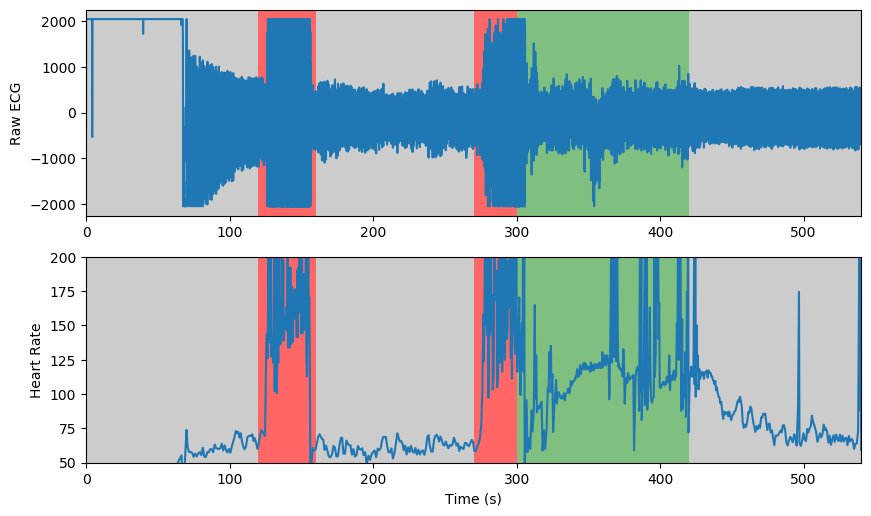

In [12]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

import numpy as np
from biosppy.signals import ecg

%run R_detection.ipynb ;


ecg_fieldwiz = np.genfromtxt("FieldWiz_Data/20200323-TR-AL.txt",delimiter=None) 
[rpeaks, th]  = gutierrez_detector(ecg_fieldwiz,250,5)
time = np.arange(0, len(ecg_fieldwiz)/250, 1/250)



plt.figure(figsize=(10, 6), dpi=100);


plt.subplot(2,1,1)
plt.plot(time,ecg_fieldwiz)
plt.ylabel('Raw ECG')
plt.xlim(0,540)
plt.axvspan(0, 120,  facecolor='grey', alpha=0.4)
plt.axvspan(160, 270,  facecolor='grey', alpha=0.4)
plt.axvspan(420, 540,  facecolor='grey', alpha=0.4)
plt.axvspan(300, 420,  facecolor='g', alpha=0.5)
plt.axvspan(120, 160,  facecolor='red', alpha=0.6)
plt.axvspan(270, 300,  facecolor='red', alpha=0.6)


    

rpeaks_amp = [60/(i/250) for i in np.diff(rpeaks)]
rpeaks_time = [i/250 for i in rpeaks]

plt.subplot(2,1,2)
rpeaks_time = rpeaks_time[0:-1]
plt.plot(rpeaks_time,rpeaks_amp)
plt.ylim(50,200)
plt.xlim(0,540)

   
plt.axvspan(0, 120,  facecolor='grey', alpha=0.4)
plt.axvspan(160, 270,  facecolor='grey', alpha=0.4)
plt.axvspan(420, 540,  facecolor='grey', alpha=0.4)
plt.axvspan(300, 420,  facecolor='g', alpha=0.5)
plt.axvspan(120, 160,  facecolor='red', alpha=0.6)
plt.axvspan(270, 300,  facecolor='red', alpha=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate')

In [2]:
sinal = ecg_fieldwiz[1380*250:1395*250]

f = signal.resample(sinal, len(sinal)*4)


plt.figure(figsize=(10, 8), dpi=100);
ecg.ecg(f,1000);

ValueError: Invalid number of FFT data points (0) specified.